In [30]:
from qsp_layers import *

# visualization tools
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import IPython

In [18]:
InteractiveShell = IPython.core.interactiveshell.InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
def plot():
    plt.plot(history.history['loss'])
    plt.title("Learning QSP Angles")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()


## QSP Class

In [7]:
qsplayer = QSP()
theta = tf.keras.Input(shape=(),
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.float32,
                                name='theta')

topleft = qsplayer(theta)
model = tf.keras.Model(inputs=theta, outputs=topleft)
print(model.trainable_weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss)


# The command input values to the classical NN.
wx_in = tfq.convert_to_tensor([
  cirq.Circuit(cirq.rx(3 / 4 * np.pi)(q))
])
# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([-1], dtype=np.float32)

history = model.fit(
    x=wx_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)

plot()


TypeError: You are attempting to use Python control flow in a layer that was not declared to be dynamic. Pass `dynamic=True` to the class constructor.
Encountered error:
"""
in user code:

    <ipython-input-6-4d3f4a4faabf>:286 call  *
        wx = cirq.Circuit(cirq.rx(2*theta_inp))
    /Library/Python/3.8/site-packages/cirq/circuits/circuit.py:127 __init__  **
        self.append(contents, strategy=strategy)
    /Library/Python/3.8/site-packages/cirq/circuits/circuit.py:1467 append
        self.insert(len(self._moments), moment_or_operation_tree, strategy)
    /Library/Python/3.8/site-packages/cirq/circuits/circuit.py:1053 insert
        moments_and_operations = list(
    /Library/Python/3.8/site-packages/cirq/ops/op_tree.py:127 flatten_to_ops_or_moments
        for subtree in root:
    /Library/Python/3.8/site-packages/cirq/ops/op_tree.py:164 <genexpr>
        transform_op_tree(subtree,
    /Library/Python/3.8/site-packages/cirq/ops/op_tree.py:170 transform_op_tree
        _bad_op_tree(root)
    /Library/Python/3.8/site-packages/cirq/ops/op_tree.py:187 _bad_op_tree
        raise TypeError(f'Not an Operation or Iterable: {type(root)} {root}')
    /Library/Python/3.8/site-packages/cirq/ops/common_gates.py:239 __str__
        if self._exponent == 1:
    /Users/jdocter/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/ops.py:877 __bool__
        self._disallow_bool_casting()
    /Users/jdocter/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/ops.py:486 _disallow_bool_casting
        self._disallow_when_autograph_enabled(
    /Users/jdocter/Library/Python/3.8/lib/python/site-packages/tensorflow/python/framework/ops.py:472 _disallow_when_autograph_enabled
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.

"""

In [4]:
N = 1
psi = sympy.symbols('psi0, psi1') 
q = cirq.GridQubit(0, 0)
theta = tf.keras.Input(shape=(),
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.float32,
                                name='theta')

c0 = cirq.Circuit(
    cirq.H(q)
    )

c1 = cirq.Circuit(
    cirq.rz(psi[1])(q)
    )
wx = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
add0 = tfq.layers.AddCircuit()(
    wx, prepend=c0 )
add1 = tfq.layers.AddCircuit()(
    add0, append=c1 )

expectation_output = tfq.layers.Expectation()(add1, symbol_names=psi,operators=[cirq.Z(q)])

# with tf.GradientTape() as tape:
#     tape.watch(psi)
#     expectation_output = UnitaryT()(add1, symbol_names=psi)

# gradients = tape.gradient(expectation_output, psi)
    
    
    

# topleft = tf.gather_nd(expectation_output,[0,0,0])
# output_layer = tfq.layers.PQC(
#         c0,
#         operators = cirq.Z(q))

quantum_data = tfq.convert_to_tensor([
    cirq.Circuit()
]*2)

print(quantum_data.shape)


output = expectation_output(quantum_data)

model = tf.keras.Model(
    inputs=wx, outputs=expectation_output)
print(model.trainable_weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss)


# The command input values to the classical NN.
wx_in = tfq.convert_to_tensor([
  cirq.Circuit(cirq.rx(3 / 4 * np.pi)(q))
])
# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([-1], dtype=np.float32)

history = model.fit(
    x=wx_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)

plot()

(2,)


TypeError: 'Tensor' object is not callable

## Using Native Models

In [41]:
N = 1
sym = sympy.symbols('psi2, th')
q = cirq.GridQubit(0, 0)
theta = tf.keras.Input(shape=(),
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.float32,
                                name='theta')

v = tf.Variable([1])
c0 = cirq.Circuit(
    cirq.rz(sym[0])(q),
    cirq.rx(sym[1])(q)
    )
# wx = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
# add = tfq.layers.AddCircuit()
# c2 = add(
#     wx, prepend=c0 )



u = tfq.layers.Unitary()(c0, symbol_names=sym, symbol_values=[, ])

model = tf.keras.Model(
    inputs=th, outputs=u)
print(model.trainable_weights)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss)


# The command input values to the classical NN.
wx_in = tfq.convert_to_tensor([
  cirq.Circuit(cirq.rx(2*np.pi)(q))
]*2)

# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([[[1,0],[0,1]],[[1,0],[0,1]]], dtype=np.float32)

history = model.fit(
    x=wx_in,
    y=expected_outputs,
    epochs=1000,
    verbose=1)
print(model.trainable_weights)
plt.plot(history.history['loss'])
plt.title("Learning to Control a Qubit")
plt.xlabel("Iterations")
plt.ylabel("Error in Control")
plt.show()


InvalidArgumentError: Could not find symbol in parameter map: psi2 [Op:TfqCalculateUnitary]

## Hybrid Controlled QSP class

(psi1, psi2)

[<tf.Variable 'parameters:0' shape=(2,) dtype=float32, numpy=array([1.2736902, 1.9714695], dtype=float32)>]
[<tf.Variable 'parameters:0' shape=(2,) dtype=float32, numpy=array([1.2205508, 1.9183576], dtype=float32)>]


Text(0.5, 1.0, 'Learning to Control a Qubit')

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error in Control')

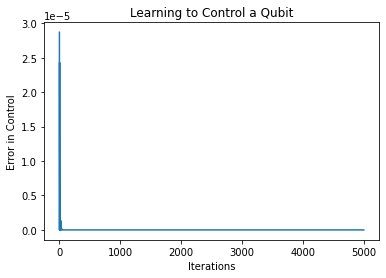

In [8]:
psi = sympy.symbols('psi0, psi1, psi2') 
q = cirq.GridQubit(0, 0)
c = cirq.Circuit(cirq.rx(psi[0])(q),cirq.rx(psi[1])(q),cirq.rz(psi[2])(q))
psi[1:]
layer = HybridControlledPQC(c,operators = cirq.Z(q),
                      controlled_symbol_names=psi[2:],
                     native_symbol_names=psi[:2])

theta = tf.keras.Input(shape=(1,), batch_size=1,
                                # The circuit-tensor has dtype `tf.string` 
                                dtype=tf.float32,
                                name='theta')
out = layer(theta)

model = tf.keras.Model(
    inputs=theta, outputs=out)
print(model.trainable_weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=optimizer, loss=loss)


# The command input values to the classical NN.
th_in = np.array([[0]], dtype=np.float32)
# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([-1], dtype=np.float32)

history = model.fit(
    x=th_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)
print(model.trainable_weights)
plt.plot(history.history['loss'])
plt.title("Learning to Control a Qubit")
plt.xlabel("Iterations")
plt.ylabel("Error in Control")
plt.show()



In [22]:
def make_qsp_model(poly_deg = 0):

    N = poly_deg
    q = cirq.GridQubit(0, 0)
    phis = [sympy.Symbol(f'phi{k}') for k in range(N + 1)]
    theta = [sympy.Symbol(f'th')]

    circuit = cirq.Circuit(cirq.rz(phis[0])(q))

    for k in range(1,N+1):
        c = cirq.Circuit(
            cirq.rx(theta[0])(q),
            cirq.rz(phis[k])(q)
        )
        circuit.append(c)
        
    controlled_qsp = HybridControlledPQC(circuit,operators = cirq.Z(q),
                          controlled_symbol_names=theta,
                          native_symbol_names=phis)
    
    theta_in = tf.keras.Input(shape=(1,),
                            # The circuit-tensor has dtype `tf.string` 
                            dtype=tf.float32,
                        name='theta')
    measurement = controlled_qsp(theta_in)

    return tf.keras.Model(inputs=theta_in, outputs=measurement), circuit

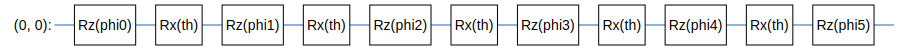

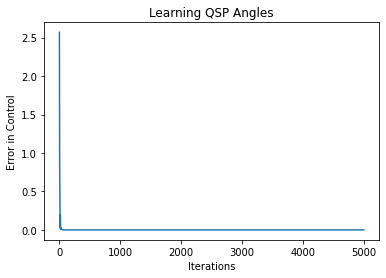

<AxesSubplot:xlabel='theta', ylabel='Z op'>

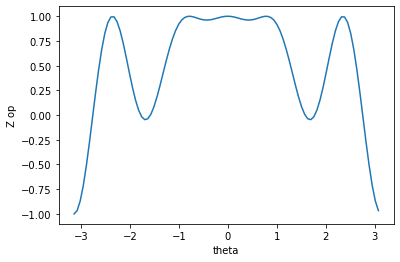

In [23]:

model, circuit = make_qsp_model(5)
SVGCircuit(circuit)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

# The command input values to the classical NN.
th_in = np.array([[np.pi/4],[3*np.pi/4]], dtype=np.float32)
# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([[1],[1]], dtype=np.float32)

history = model.fit(
    x=th_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)

plot()

all_th = np.arange(-np.pi,np.pi,np.pi/50)
out = tf.reshape(model.predict(all_th), (len(all_th,)))

sns.lineplot(x='theta',y='Z op',data={'theta': all_th,'Z op': out})


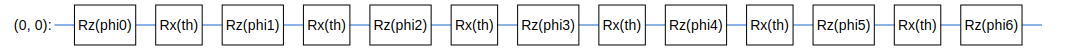

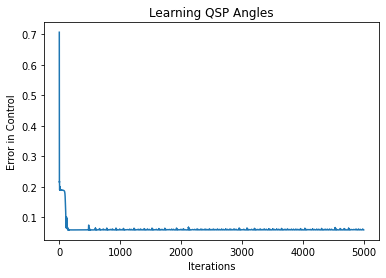

<AxesSubplot:xlabel='theta', ylabel='Z op'>

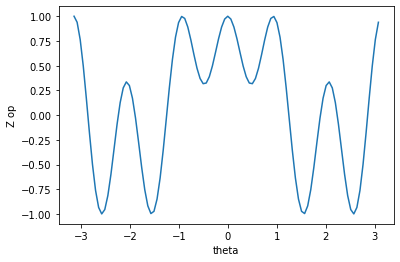

In [25]:
model, circuit = make_qsp_model(6)
SVGCircuit(circuit)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

# The command input values to the classical NN.
th_in = np.array([[0],[0.5],[0.7],[1.9]], dtype=np.float32)
# The desired expectation value at output of quantum circuit.
expected_outputs = np.array([[1],[0],[1],[0]], dtype=np.float32)

history = model.fit(
    x=th_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)

plot()

all_th = np.arange(-np.pi,np.pi,np.pi/50)
out = tf.reshape(model.predict(all_th), (len(all_th,)))

sns.lineplot(x='theta',y='Z op',data={'theta': all_th,'Z op': out})


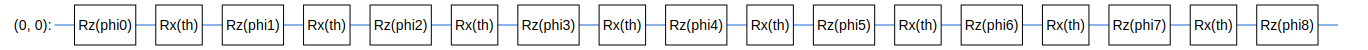

<tf.Tensor: shape=(40, 1), dtype=float64, numpy=
array([[-3.14159265],
       [-2.98451302],
       [-2.82743339],
       [-2.67035376],
       [-2.51327412],
       [-2.35619449],
       [-2.19911486],
       [-2.04203522],
       [-1.88495559],
       [-1.72787596],
       [-1.57079633],
       [-1.41371669],
       [-1.25663706],
       [-1.09955743],
       [-0.9424778 ],
       [-0.78539816],
       [-0.62831853],
       [-0.4712389 ],
       [-0.31415927],
       [-0.15707963],
       [ 0.        ],
       [ 0.15707963],
       [ 0.31415927],
       [ 0.4712389 ],
       [ 0.62831853],
       [ 0.78539816],
       [ 0.9424778 ],
       [ 1.09955743],
       [ 1.25663706],
       [ 1.41371669],
       [ 1.57079633],
       [ 1.72787596],
       [ 1.88495559],
       [ 2.04203522],
       [ 2.19911486],
       [ 2.35619449],
       [ 2.51327412],
       [ 2.67035376],
       [ 2.82743339],
       [ 2.98451302]])>

array([[-1.00000000e+00],
       [-9.87688341e-01],
       [-9.51056516e-01],
       [-8.91006524e-01],
       [-8.09016994e-01],
       [-7.07106781e-01],
       [-5.87785252e-01],
       [-4.53990500e-01],
       [-3.09016994e-01],
       [-1.56434465e-01],
       [ 6.12323400e-17],
       [ 1.56434465e-01],
       [ 3.09016994e-01],
       [ 4.53990500e-01],
       [ 5.87785252e-01],
       [ 7.07106781e-01],
       [ 8.09016994e-01],
       [ 8.91006524e-01],
       [ 9.51056516e-01],
       [ 9.87688341e-01],
       [ 1.00000000e+00],
       [ 9.87688341e-01],
       [ 9.51056516e-01],
       [ 8.91006524e-01],
       [ 8.09016994e-01],
       [ 7.07106781e-01],
       [ 5.87785252e-01],
       [ 4.53990500e-01],
       [ 3.09016994e-01],
       [ 1.56434465e-01],
       [ 6.12323400e-17],
       [-1.56434465e-01],
       [-3.09016994e-01],
       [-4.53990500e-01],
       [-5.87785252e-01],
       [-7.07106781e-01],
       [-8.09016994e-01],
       [-8.91006524e-01],
       [-9.5

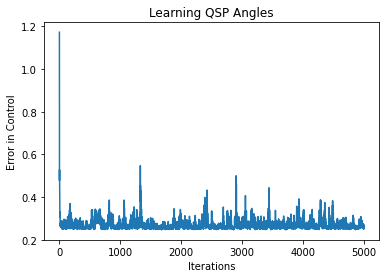

<AxesSubplot:xlabel='theta', ylabel='vals'>

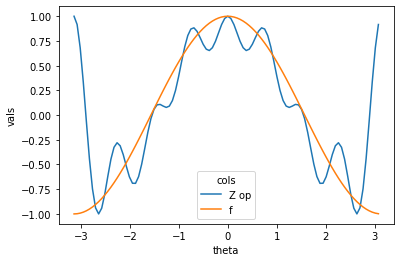

In [33]:
model, circuit = make_qsp_model(8)
SVGCircuit(circuit)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

# The command input values to the classical NN.
th_in = np.arange(-np.pi,np.pi,np.pi/20)
th_in = tf.reshape(th_in, (th_in.shape[0],1))

# The desired expectation value at output of quantum circuit.
expected_outputs = np.cos(th_in)

history = model.fit(
    x=th_in,
    y=expected_outputs,
    epochs=5000,
    verbose=0)

plot()

all_th = np.arange(-np.pi,np.pi,np.pi/50)

out = tf.reshape(model.predict(all_th), (len(all_th,)))
df = pd.DataFrame({'theta': all_th,'Z op': out, 'f': np.cos(all_th)})
df = df.melt('theta', var_name='cols',  value_name='vals')
sns.lineplot(x='theta', y="vals", hue='cols', data=df)